In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

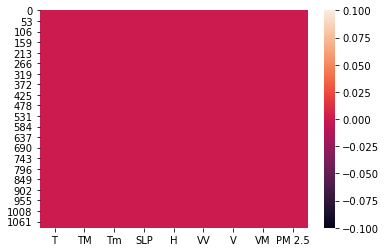

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")
df=df.dropna()
sns.heatmap(df.isnull())

In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9659851017530761


In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.806888904791944


In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
score.mean()

0.7180049909066929

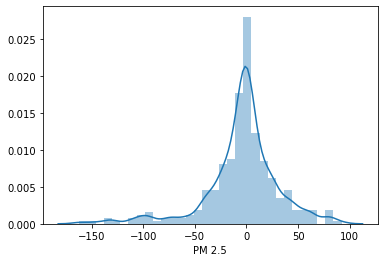

In [16]:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

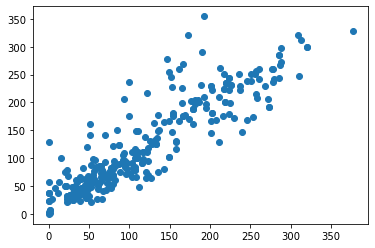

In [17]:
plt.scatter(y_test,prediction)

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
#n_estimator is here you will take 12 values from 100 to 1200
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [25]:
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [24]:
rf = RandomForestRegressor()

In [26]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.4s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=5, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.8s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.7s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=800, min_samples_spl

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   2.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=1100, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.1min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [28]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [29]:
rf_random.best_score_

-1752.4873125024033

In [30]:
predictions=rf_random.predict(X_test)

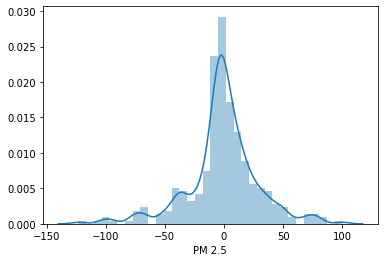

In [31]:
sns.distplot(y_test-predictions)

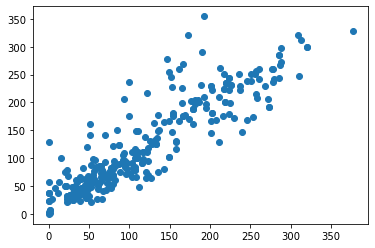

In [32]:
plt.scatter(y_test,prediction)

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.408302094667388
MSE: 908.8030794612462
RMSE: 30.146360965483815


In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.403830030487807
MSE: 1314.7531632489627
RMSE: 36.25952513821662


In [40]:
import pickle


# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

